# **Competition Description** 

Kaggle competition [link](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)

![image](https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png)


Determining the price of a home is more complex than simply multiplying its lot size with its rates. Some factors like number of bedrooms, sizes of the rooms, and the neighborhood, are apparent features. But there are some features that impact the price of a home like the quality of the basement, the exterior finishes, and more. 

We are working with a dataset that has 79 explanatory variables describing features of homes in Ames, Iowa. Your task is to learn the trends in the data and build a generalizable machine learning model that can predict the price of a house given its features. 

## Objectives 

- Read and preprocess the data
    - Data Cleaning 
    - EDA
- Build a linear model to predict the house prices

In [1]:
# Importing the foundational libraries 

# data manipulation libraries
import pandas as pd
import numpy as np
import pylab as pl

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Hide warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# reading the data
data = pd.read_csv("Iowa_housing_dataset.csv")

# 1 Data Cleaning

Data Cleaning involves sanitary checks on data, heuristically eliminating noise in the data. 

We will be performing the following checks on the data. 

1. Drop columns that do not add any information. E.g., Id. 
2. Check for missing values and deal with missing values. 
3. Perform sanity checks if possible. 
This requires domain knowledge. So, we will not perform sanity checks in this notebook.
4. Check and deal with outliers.
There are too many numerical columns and we cannot afford to drop any rows, so we will not perform outlier elimination.

In [3]:
# Check the data shape
data.shape

(1460, 81)

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Data Dictionary 

Here's a brief version of what you'll find in the data description file.
- **Label**
  - **SalePrice:** The property's sale price in dollars. This is the target variable that you're trying to predict.
- **Locality and Zoning**  
  - **MSSubClass:** The building class
  - **MSZoning:** The general zoning classification
  - **LotFrontage:** Linear feet of street connected to property
  - **Street:** Type of road access
  - **Alley:** Type of alley access
  - **LotShape:** General shape of property
  - **LandContour:** Flatness of the property
  - **LotConfig:** Lot configuration
  - **LandSlope:** Slope of property
  - **Neighborhood:** Physical locations within Ames city limits
  - **Condition1:** Proximity to main road or railroad
  - **Condition2:** Proximity to main road or railroad (if a second is present)
  - **BldgType:** Type of dwelling
-**Overall house finishes and condition**  
  - **HouseStyle:** Style of dwelling
  - **OverallQual:** Overall material and finish quality
  - **OverallCond:** Overall condition rating
  - **YearBuilt:** Original construction date
  - **YearRemodAdd:** Remodel date
  - **RoofStyle:** Type of roof
  - **RoofMatl:** Roof material
  - **Exterior1st:** Exterior covering on house
  - **Exterior2nd:** Exterior covering on house (if more than one material)
  - **MasVnrType:** Masonry veneer type
  - **MasVnrArea:** Masonry veneer area in square feet
  - **ExterQual:** Exterior material quality
  - **ExterCond:** Present condition of the material on the exterior
  - **Foundation:** Type of foundation
- **Basement finishes and condition**
  - **BsmtQual:** Height of the basement
  - **BsmtCond:** General condition of the basement
  - **BsmtExposure:** Walkout or garden level basement walls
  - **BsmtFinType1:** Quality of basement finished area
  - **BsmtFinSF1:** Type 1 finished square feet
  - **BsmtFinType2:** Quality of second finished area (if present)
  - **BsmtFinSF2:** Type 2 finished square feet
  - **BsmtUnfSF:** Unfinished square feet of basement area
  - **TotalBsmtSF:** Total square feet of basement area
  - **BsmtFullBath:** Basement full bathrooms
  - **BsmtHalfBath:** Basement half bathrooms
-**Utilities**
  - **Utilities:** Type of utilities available
  - **Heating:** Type of heating
  - **HeatingQC:** Heating quality and condition
  - **CentralAir:** Central air conditioning
  - **Electrical:** Electrical system
-**Area related features**
  - **LotArea:** Lot size in square feet
  - **1stFlrSF:** First floor square feet
  - **2ndFlrSF:** Second floor square feet
  - **LowQualFinSF:** Low quality finished square feet (all floors)
  - **GrLivArea:** Above grade (ground) living area square feet
-**Indoor features**
  - **FullBath:** Full bathrooms above grade
  - **HalfBath:** Half baths above grade
  - **Bedroom:** Number of bedrooms above basement level
  - **Kitchen:** Number of kitchens
  - **KitchenQual:** Kitchen quality
  - **TotRmsAbvGrd:** Total rooms above grade (does not include bathrooms)
  - **Functional:** Home functionality rating
  - **Fireplaces:** Number of fireplaces
  - **FireplaceQu:** Fireplace quality
- **Garage:**
  - **GarageType:** Garage location
  - **GarageYrBlt:** Year garage was built
  - **GarageFinish:** Interior finish of the garage
  - **GarageCars:** Size of garage in car capacity
  - **GarageArea:** Size of garage in square feet
  - **GarageQual:** Garage quality
  - **GarageCond:** Garage condition
- **Outdoor features** 
  - **PavedDrive:** Paved driveway
  - **WoodDeckSF:** Wood deck area in square feet
  - **OpenPorchSF:** Open porch area in square feet
  - **EnclosedPorch:** Enclosed porch area in square feet
  - **3SsnPorch:** Three season porch area in square feet
  - **ScreenPorch:** Screen porch area in square feet
  - **PoolArea:** Pool area in square feet
  - **PoolQC:** Pool quality
  - **Fence:** Fence quality
  - **MiscFeature:** Miscellaneous feature not covered in other categories
  - **MiscVal:** $Value of miscellaneous feature
- **Additional sale information**
  - **MoSold:** Month Sold
  - **YrSold:** Year Sold
  - **SaleType:** Type of sale
  - **SaleCondition:** Condition of sale


### Note

The category titles like "label", and "Locality and zoning" are not present in the data; they are given here so that you can quickly navigate the dictionary and locate the features. 

## Drop unnecessary columns

The column ID has no impact on the house price, so let's drop it. 



In [6]:
# Drop the "ID" column
data = data.drop (["Id"], axis =1)

## Check and deal with missing values.  

In [7]:
# Check for Missing Values 
missing_data = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False).head(20)

Let's visualize the missing data

<AxesSubplot:>

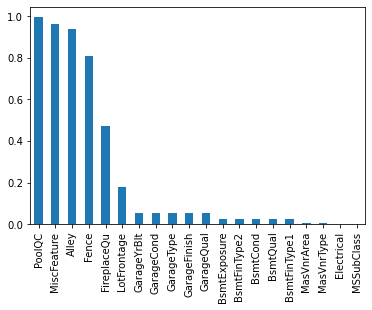

In [8]:
missing_data.plot.bar()

For instance, in the column 'PoolQC' more than 90% of data is missing. Let's say that you imputed the missing data with 0, or 1 or mean, or any other measure; then more than 90% of that column would be the same value. This will not add any information. 

Let's start by dropping columns with more than 80% missing data.

In [9]:
# Drop columns
data = data.drop (["PoolQC","MiscFeature","Alley","Fence"], axis =1)

For the rest of the missing values, there are four approaches. 

1. Drop the rows with missing values. This is not a good choice since we have limited data.
2. Impute missing data with some representative value. This is a good option, but we might unintentionally introduce some noise in the data. 
3. Leave the missing data as is. 

In [10]:
# Check for Missing Values 
missing = (data.isnull().sum()).sort_values(ascending=False).head(20)

Let's explore the data before dealing with missing values. Once we have a sense of the data, we can decide which value to impute in the data. 

Separate out categorical and numerical columns 

In [11]:
numerical = []
categorical = []

for col in (data.columns):
    if data[col].dtype == "object":
        categorical.append(col)
    else:
        numerical.append(col)


In [12]:
# Getting column types
col_type = []
for i in missing.index:
    if i in numerical:
        col_type.append("numerical")
    elif i in categorical:
        col_type.append("categorical")

Create a dataframe to show missing values and their column types. 

In [13]:
col_type_series = pd.Series(col_type, index =missing.index)

In [14]:
missing_dict = {"Missing_values": missing,
        "Col_Type": col_type_series}

In [15]:
missing_df = pd.concat(missing_dict,
               axis = 1)

In [16]:
#Filtering columns with missing values
missing_df[missing_df['Missing_values'] > 0]

,Missing_values,Col_Type
FireplaceQu,690,categorical
LotFrontage,259,numerical
GarageType,81,categorical
GarageYrBlt,81,numerical
GarageFinish,81,categorical
GarageQual,81,categorical
GarageCond,81,categorical
BsmtExposure,38,categorical
BsmtFinType2,38,categorical
BsmtQual,37,categorical


# 2 EDA

In the section on EDA let's explore the frequency distributions of all columns

In [17]:
import math

In [18]:
# number of columns in the sub plot 
n=2

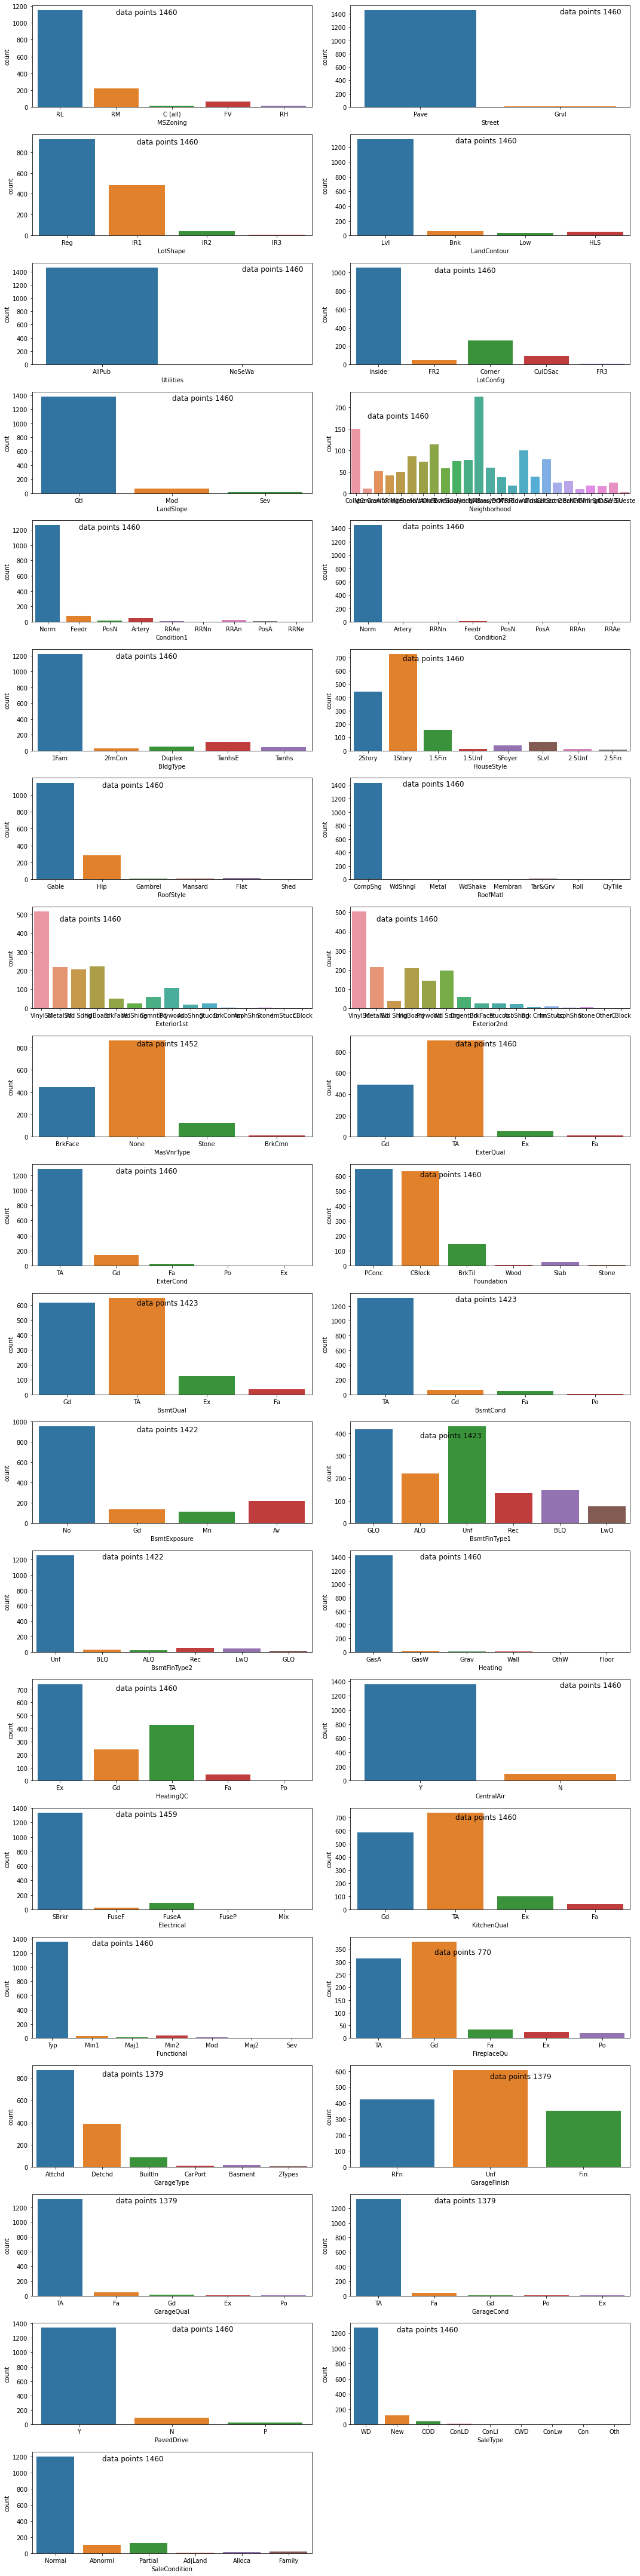

In [19]:
# The code below creates plot with bar charts for all categorical columns 

plt.figure(figsize=[15,3*math.ceil(len(categorical)/n)])

for i in range(len(categorical)):
    plt.subplot(math.ceil(len(categorical)/n),n,i+1)
    sns.countplot(data[categorical[i]])
    # text in each plot represents the number of data points 
    text = "data points " + str(data[categorical[i]].value_counts().sum())
    plt.text(1, data[categorical[i]].value_counts().max() - 50, text , fontsize=12)

plt.tight_layout()
plt.show()

**Note**

Observations 

1. There are three columns with more than ten categories. ``exterior1st`` ``exterior2nd`` and ``neighborhood``. 
2. Most of the categories have one dominating class.
3. The plot for ```FireplaceQu``` only used 770 data points out of 1460. This means that the other points are missing. Also, the categories in this column represent the quality of the fireplace. Gd might be good, and Fa might be fare, etc. One possibility for missing values is that those houses might not have fireplaces, to begin with. The discovery make for this column might be applicable to the other columns as well. 

Let's revisit this thought after analyzing numerical columns



Conclusion 

The feature matrix will become sparse when we create dummy variables for these categories. 

There will be too many features that might not contribute in increasing model predictability. 

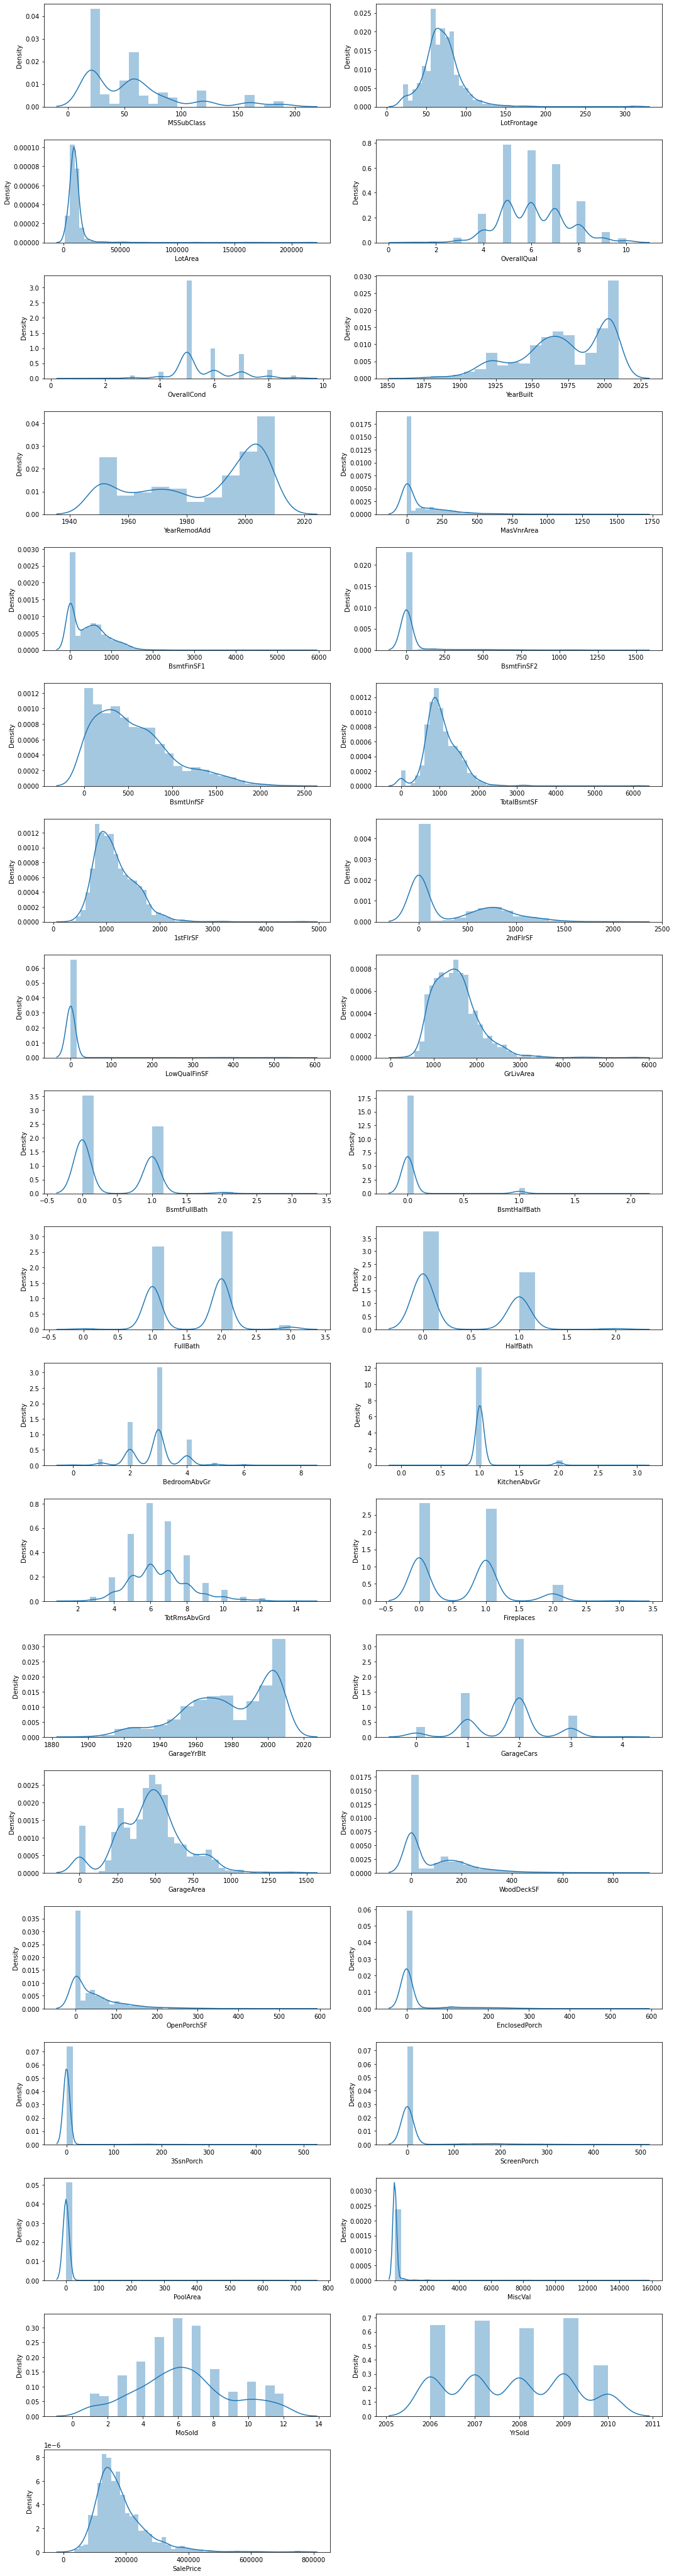

In [20]:
# The code below will plot histograms for all numerical columns 

plt.figure(figsize=[15,3*math.ceil(len(numerical)/n)])

for i in range(len(numerical)):
    plt.subplot(math.ceil(len(numerical)/n),n,i+1)
    sns.distplot(data[numerical[i]])

plt.tight_layout()
plt.show()

**Note**


Observations 

1. There are many columns with long tails. This indicates that there are a lot of outliers in this data, we will deal with outliers a bit later in this notebook.  
2. The label "SalePrice" also has a long tail. 
3. A few categorical columns like YrSold and MoSold have also entered the numerical column list. Since they will not have an impact on the label, let's drop them. 
4. There are some ordered variables as well, like Garagecars. Garagecars is a discrete variable, but it is not a categorical variable. A two-car garage is undoubtedly more valuable than one car garage. So, we will leave them as they are. 

Let's look at the plot for ```Fireplaces``` 

We know that the FireplaceQu had 690 missing values. 

In [21]:
data['Fireplaces'].value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

Clearly, the 690 homes with missing value in ```FireplaceQu``` do not have a fireplace, and hence they did not have a quality rating for the fireplace.

Let's check one more categorical column with missing data to confirm whether this is true for all missing data cases. 

In [22]:
data['GarageCars'].value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

There are 81 houses without Garages, so all variables which describe garage condition and finish have 81 missing values. the same can be seen in the ```missing_df```

So, for all numerical columns except for ```LotFrontage``` with missing values, let's impute 0, and for ```LotFrontage```, let's impute mean values since there are no other features that will help us impute those values. 

For all missing values in categorical columns, let's impute the word "none" as it will be a data feature signifying that this house does not have that feature.  

## Imputing missing values

In [23]:
# Fill categorical columns with "none" 
for col in categorical:
    data[col] = data[col].fillna("none")

In [24]:
# Fill numerical columns with mean value
for col in numerical:
    if col == "LotFrontage":
        data[col] = data[col].fillna(data[col].mean())
    else:
        data[col] = data[col].fillna(0)
  

In [25]:
# Recheck for Missing Values 
(data.isnull().sum()).sort_values(ascending=False).head(20)

MSSubClass      0
HalfBath        0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
FullBath        0
MSZoning        0
BsmtHalfBath    0
BsmtFullBath    0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
1stFlrSF        0
Electrical      0
GarageType      0
GarageYrBlt     0
dtype: int64

## Dealing with Outliers

As you saw in the distribution plots, there are a few numerical columns with long tails. 

Since we have so small a dataset, ideally, we would have left the outlier as is, but this long-tail outlier will skew our model one way, so we need to deal with them. Instead of trapping the outliers, we will cap them. 

If any column has its 99th percentile value less than half of the max value, we will cap it at the 99th percentile. 

In [26]:
# example 1 - a column that will be capped
data['LotArea'].quantile(0.99), data['LotArea'].max()

(37567.64000000021, 215245)

In [27]:
# example 2 - a column that will not be capped
data['GarageArea'].quantile(0.99), data['GarageArea'].max()

(1002.7900000000016, 1418)

In [28]:
# Dealing with outliers by capping
for col in numerical:
    percentiles = data[col].quantile(0.99)
    if data[col].quantile(0.99) < 0.5 * data[col].max():
      data[col][data[col] >= percentiles] = percentiles

In [29]:
# example 1 was capped
data['LotArea'].quantile(0.99), data['LotArea'].max()

(36937.732400000175, 37567.64000000021)

In [30]:
# example 2 - was not capped
data['GarageArea'].quantile(0.99), data['GarageArea'].max()

(1002.7900000000016, 1418)

# 3 Data prep for linear models

1. Create a train test split. 

We already have train test split data. And since the train set is so small, we will use cross-validation scores instead of dividing the dataset further. 
All the data massaging we have done on the train data needs to be done on the test data as well. 

2. Create dummy variables for categorical data

Ideally, when the number of categorical variables is as high as we have, it is not advised to encode them using one-hot encoding. As discussed earlier, one hot or dummy encoding will create a very sparse feature space. Later in the program, you will learn especially useful techniques in encoding sparse data like text. 

## Creating dummy variables. 

In [31]:
# number of columns before dummy data 
data.shape

(1460, 76)

In [32]:
data = pd.get_dummies(data, columns= categorical, drop_first = True )

In [33]:
data.shape

(1460, 249)

## Train Test Split

In [34]:
# collect all features in a list 
features = list(data.columns)

#remove the label from the list of features 
features.remove('SalePrice')

In [35]:
# Separate 
x = data[features]
y = data['SalePrice']

In [36]:
from sklearn.model_selection import train_test_split

Create a small dataset for the test since we do not have a lot of data points in the data. 

In [37]:
# create a test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

Now let's forget about the test set. We will use it to test the model performance at the end of the model selection process. 

# 4 Build a baseline model 

Using a vanilla linear regression, we will build a baseline model. The performance of this model will be used as the baseline. And any model we build after this needs to perform better than this one. 

1. Build a baseline model with vanilla linear regression. 

2. Create a data frame to store the model results and the performance metrics. 
3. Write the data frame to a CSV and save it for future use. 

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [39]:
#Let's fit a linear regression model!
linear_regressor = LinearRegression()
linear_regressor.fit(x_train,y_train)

LinearRegression()

In [40]:
# Cross validation scores for the model. 
# The metric that cross-validation returns is the default metric for that family of algorithms. 
# e.g., for linear regression, it will be r2; for classification, it will be accuracy
crossvalidation = cross_val_score(linear_regressor, x_train, y_train, cv=5, n_jobs=-1)
crossvalidation

array([ 0.81322014, -0.07398576,  0.74281382,  0.02033232,  0.86718269])

In [41]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [42]:
# predictions on the train set. 
y_pred = linear_regressor.predict(x_train)

In [43]:
# evaluation metrics value 
r2_val = r2_score(y_train,y_pred)
rmse_error = mean_squared_error (y_train, y_pred, squared = False)
print ("R2 score for the model is :",r2_val )
print ("RMSE error for the model is :",rmse_error )

R2 score for the model is : 0.9340130537645993
RMSE error for the model is : 19838.912904397126


In [44]:
y_pred_test = linear_regressor.predict(x_test)
r2_val_test = r2_score(y_test,y_pred_test)
rmse_error_test = mean_squared_error (y_test, y_pred_test, squared = False)
print ("R2 score (test) for the model is :",r2_val_test )
print ("RMSE error (test) for the model is :",rmse_error_test )

R2 score (test) for the model is : 0.8486051395773169
RMSE error (test) for the model is : 34077.08857184756


Create a dataframe to store the results. 

In [45]:
entry = {'Model': ["Baseline"],
         'Regularization' : ["NA"],
         'Alpha_value' : ["NA"],
         'R2Score': [r2_val],
         'RMSE': [rmse_error],
         'R2Score_Test': [r2_val_test],
         'RMSE_Test': [rmse_error_test],
         'CrossVal_Mean(r2)': [crossvalidation.mean()],         
         'CrossVal1(r2)': [crossvalidation[0]],
         'CrossVal2(r2)': [crossvalidation[1]],
         'CrossVal3(r2)': [crossvalidation[2]],
         'CrossVal4(r2)': [crossvalidation[3]],
         'CrossVal5(r2)': [crossvalidation[4]],
        }

result = pd.DataFrame(entry)

In [46]:
result

,Model,Regularization,Alpha_value,R2Score,RMSE,R2Score_Test,RMSE_Test,CrossVal_Mean(r2),CrossVal1(r2),CrossVal2(r2),CrossVal3(r2),CrossVal4(r2),CrossVal5(r2)
0,Baseline,NA,NA,0.934013,19838.912904,0.848605,34077.088572,0.473913,0.81322,-0.073986,0.742814,0.020332,0.867183


In [47]:
# look at the coefficients of the model 

linear_regressor.coef_

array([ 6.27824806e+01,  3.14029987e+01,  1.05423385e+00,  6.59440314e+03,
        6.00835590e+03,  3.75525157e+02,  1.35767871e+02,  1.17736770e+01,
        7.98824704e+01,  7.03496985e+01,  6.10784426e+01, -3.35260600e+01,
        1.04573624e+02,  1.26666662e+02,  9.32507484e+01, -5.86675024e+01,
        1.35443870e+03, -1.69880287e+03,  3.10475115e+03,  3.27701349e+02,
       -3.37758993e+03, -1.16928050e+04,  1.05780698e+03,  7.14145728e+03,
       -1.88664160e+01,  1.16022369e+03,  2.67475511e+01,  1.41078961e+01,
        1.94518915e+00,  9.60254165e+00,  8.00328912e+01,  2.25344267e+01,
        5.93313416e-08,  1.88783208e+00, -4.23459841e+02, -5.11650338e+02,
        3.12748554e+04,  2.11862180e+04,  2.04040733e+04,  2.25686837e+04,
        1.31229071e+04,  4.39503542e+03,  1.23201567e+04,  1.24748337e+03,
        1.20370013e+04, -8.27256638e+03,  2.25495967e+03, -1.33821970e+04,
        9.45112561e+03, -7.56271320e+03, -2.17314615e+04, -5.78084924e+01,
        2.99883245e+03,  

In [48]:
# write results to csv for future use. 

result.to_csv("result.csv")

In [49]:
x_train.to_csv("x_train.csv")
y_train.to_csv("y_train.csv")

x_test.to_csv("x_test.csv")
y_test.to_csv("y_test.csv")

Next, let's use the concepts of model selection to make the model more generalizable.